#LR

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

Text(0, 0.5, 'Package(in lpa)')

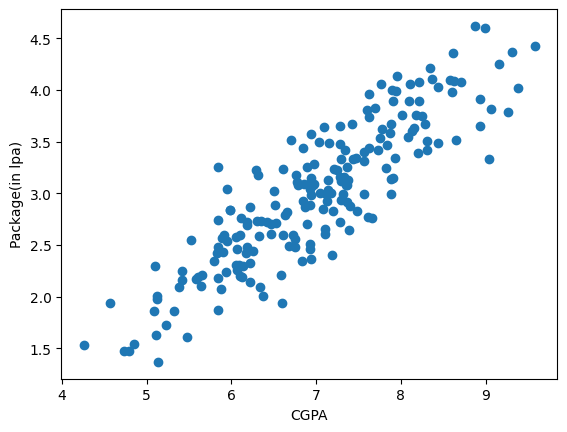

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [12]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

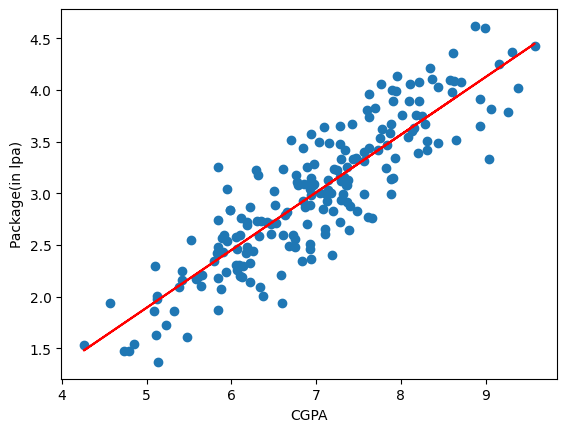

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

#Regression Metrices


In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
y_pred = lr.predict(X_test)

In [17]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [18]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [19]:
print("MAE", mean_absolute_error(y_pred,y_test))

MAE 0.2884710931878175


In [20]:
print("MSE", mean_squared_error(y_test,y_pred)) #not return LPA

MAE 0.12129235313495527


In [21]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [64]:
print("R2 Score",r2_score(y_test,y_pred)) #78% cgpa column are variance exclamied
r2 = r2_score(y_test,y_pred)

R2 Score 0.8274813161648698


In [25]:
X_test.shape

(40, 1)

In [26]:
#Adjusted R2 Score

1 - (1 - r2) * (40-1) / (40-1-1)

0.7749598882343415

#Add Random Values

In [31]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]

In [32]:
new_df.head()

,cgpa,random_feature,package
0,6.89,0.936919,3.26
1,5.12,0.865174,1.98
2,7.82,0.539826,3.25
3,7.42,0.266728,3.67
4,6.94,0.961438,3.57


Text(0, 0.5, 'Package(in lpa)')

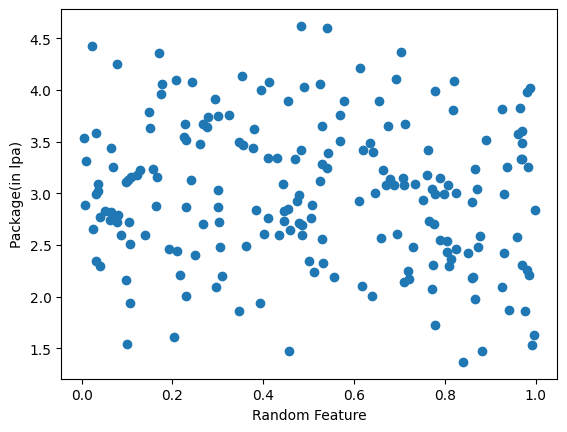

In [38]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package(in lpa)')

In [48]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

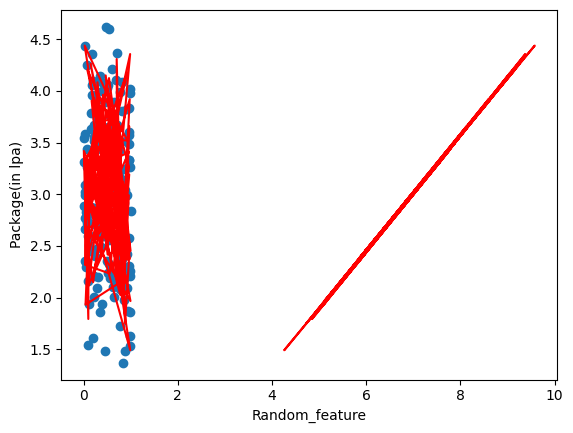

In [49]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Random_feature')
plt.ylabel('Package(in lpa)')

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_pred

array([3.88419535, 3.10778649, 2.39090315, 2.57369035, 1.64595114,
       1.77107191, 2.08392277, 2.93811542, 3.76814093, 2.93016768,
       4.10023728, 3.50955327, 2.95461   , 2.38792722, 3.19694745,
       3.46928651, 1.93551209, 3.23692097, 2.98535142, 3.41717682,
       2.54977491, 3.16673957, 2.85605997, 3.11942171, 3.67829414,
       2.87018384, 3.48141347, 3.35485484, 3.93133346, 1.96143674,
       3.64182189, 3.22184847, 3.7444082 , 2.77304479, 2.79483343,
       3.2694084 , 3.52740442, 2.60024018, 2.64819083, 2.70950956])

In [63]:
#R2 Score
print("R2 Score",r2_score(y_test,y_pred)) #77% cgpa column are variance exclamied
r2 = r2_score(y_test,y_pred)

R2 Score 0.8274813161648698


In [53]:
X_test.shape

(40, 2)

In [54]:
#Adjusted R2 Score

1 - (1 - r2) * (40-1) / (40-1-2)

0.7678619118150595

#Add Relavent Column

In [56]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [57]:
new_df2.sample(5)

,cgpa,iq,package
141,6.76,3.18,3.18
100,7.95,4.94,4.14
41,6.89,2.00,2.70
119,7.39,2.75,2.65
45,7.87,2.98,3.58


Text(0, 0.5, 'Package(in lpa)')

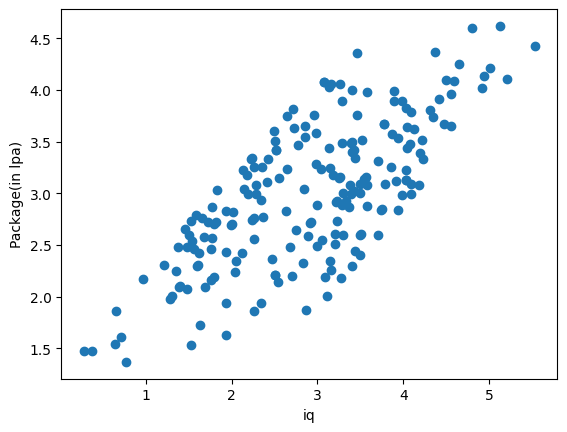

In [58]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [59]:
np.random.randint(-100,100)

-71

In [60]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [61]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8274813161648698


In [62]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8181559819035114